In [1]:
#My imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Activation, Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
import scipy.stats as stats

In [2]:
#read in the data
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [3]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])

In [4]:
#Prediction vector
y = df['phot_g_mean_mag']

In [5]:
#Splitting data into train, test
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [6]:
#Time for scaling and pre processing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Instantiate our Neural Network. We will use 128 neurons for first layer and then 64. It is quite a big dataset so it makes sense
model = Sequential()
model.add(Dense(128, input_shape = [33]))
#We will luse leaky relu due to the amount of negatives in our dataset. It is quite linear, so only a small alpha value is needed
model.add(LeakyReLU(alpha=0.023))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.023))
model.add(Dense(1))
#Adam optimiser is perfecly fine for this case
model.compile(loss='mean_squared_error', optimizer = 'adam' , metrics=['mae'])
model.summary()
    

C:\Users\ishan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ishan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Fitting the data
model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 150)

Epoch 1/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 4s 735us/step - loss: 5.0733 - mae: 1.0784 - val_loss: 0.0135 - val_mae: 0.0809
Epoch 2/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 705us/step - loss: 0.0220 - mae: 0.0895 - val_loss: 0.0067 - val_mae: 0.0645
Epoch 3/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 708us/step - loss: 0.0054 - mae: 0.0497 - val_loss: 0.0043 - val_mae: 0.0402
Epoch 4/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 705us/step - loss: 0.0025 - mae: 0.0316 - val_loss: 0.0064 - val_mae: 0.0454
Epoch 5/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 710us/step - loss: 0.0029 - mae: 0.0310 - val_loss: 3.2711e-04 - val_mae: 0.0111
Epoch 6/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 699us/step - loss: 0.0015 - mae: 0.0218 - val_loss: 0.0020 - val_mae: 0.0334
Epoch 7/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 706us/step - loss: 0.0013 - mae: 0.0204 - val_loss: 1.1973e-04 - val_mae: 0.0066
Epoch 8/150
4503/4503 ━━━━━━━━━━━━━━━━━━━━ 3s 709us/step - loss: 0.0039 - mae: 0.0315 - val_loss: 1.0955e-04 - val_mae: 0.0068
Epoc

In [9]:
#Prediction the data
y_pred_test = model.predict(X_test_scaled)

2413/2413 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step


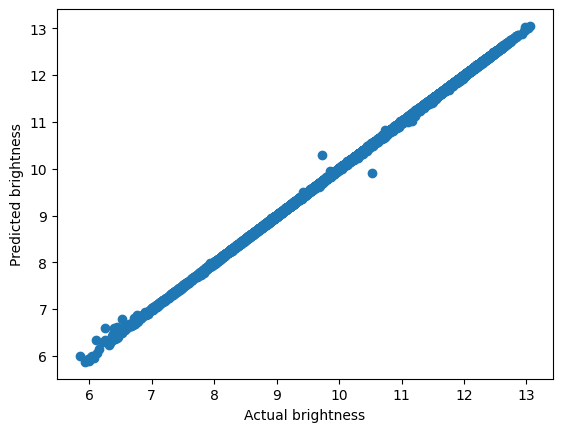

In [10]:
#Graph prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [11]:
#loss functions (we dont get much loss)
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE

0.0007045675951225664

In [12]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis
#This is quite a high R^2 score.

0.9998887240733143

In [13]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F

0.9985550859231891

In [14]:
#P value (Assuming a two tailed test with alpha = 0.05, confidence interval = 0.95
p_value = stats.f.sf(F, 32, 32)
p_value
#Since our p value is greater than our alpha value, we can reject our alternate hypothesis, as the outputs are NOT significantly different. This works the other way around for our F test

0.5016188903893879